In [1]:
"""
[CNN(합성곱신경망)]
- 딥러닝의 가장 대표적인 방법
- 주로 이미지 인식에 많이 사용 됨 
- 차원 축소를 하지 않음
- 기존의 DNN(심층 신경망 )은 1차원으로 차원축소를 통해 입력 데이터를 만들게 되어
원래 이미지의 공간정보를 유지한 상태로 학습이 어려움 
- 이를 개선하고자 나온 개념이 합성곱 신경망(CNN) 임 
    원본의 차원을 가능한 그대로 유지하여 훈련함 
- 기존 DNN은 (행의 갯수, 픽셀, 픽셀)
- CNN은 (행의갯수, 픽셀, 픽셀, 컬러값)

<CNN과 DNN의 차이점>
- CNN은 각 레이어의 입출력 데이터의 형성을 그대로 유지 
- 이미지의 공간정보를 유지하면서, 인접 이미지와의 특징을 효과적으로 인식 
- 복수의 필터(filter)를 사용하여 이미지의 특징을 추출할 수 있음 
"""

'\n[CNN(합성곱신경망)]\n- 딥러닝의 가장 대표적인 방법\n- 주로 이미지 인식에 많이 사용 됨 \n- 차원 축소를 하지 않음\n- 기존의 DNN(심층 신경망 )은 1차원으로 차원축소를 통해 입력 데이터를 만들게 되어\n원래 이미지의 공간정보를 유지한 상태로 학습이 어려움 \n- 이를 개선하고자 나온 개념이 합성곱 신경망(CNN) 임 \n    원본의 차원을 가능한 그대로 유지하여 훈련함 \n- 기존 DNN은 (행의 갯수, 픽셀, 픽셀)\n- CNN은 (행의갯수, 픽셀, 픽셀, 컬러값)\n\n<CNN과 DNN의 차이점>\n- CNN은 각 레이어의 입출력 데이터의 형성을 그대로 유지 \n- 이미지의 공간정보를 유지하면서, 인접 이미지와의 특징을 효과적으로 인식 \n- 복수의 필터(filter)를 사용하여 이미지의 특징을 추출할 수 있음 \n'

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
# 패션데이터 읽어 들이고 차원 확인 
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# CNN은 4차원 데이터 -> 차원 증가를 해야 한다 
# CNN은 4차원으로 벼놘하여 정규화해야한다 
# 차원 증강하기 
# -1 : 모든 데이터(행)을 의미 
# 28 : 너비 픽셀 
# 28 : 높이 픽셀 
# 컬러채널(1은 흑백, 3은 컬러를 의미)
# 1 : 흑백은 단색으로 채널이 1개라는 의미로 1을 사용 
# 3: 컬러인 경우 RGB로 채널이 3개라는 의미로 3을 사용 
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled.shape

(60000, 28, 28, 1)

In [5]:
# 훈련및 검증 데이터로 분리하기 : 8:2로 분리 
train_scaled, val_scaled,train_target, val_target = \
train_test_split (train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, train_target.shape)
print (val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


# 합성곱 신경망 (CNN) 모델 생성하기 

In [6]:
# 모델 생성하기 
model = keras.Sequential()
model

In [7]:
# 합성곱 신경망 (CNN) 계층 추가하기 : Conv2D
# filters=32,: 필터개수 ( 동일한 값을 가짐 훔련모델이 값을 알아서 채움 )
# kernel_size=3, : 필터의 형태저의 (3은 3행 3열을 의미)
#               :3행 3열으로 32개 만듦
# - 커널 사이즈는 보통 3*3 또는 5* 5를 주로 사용함 
# - 필터의 개수가 많으면 많을 수록 훈련속도는 매우 느려짐(시스템의 성능이 좋아야한다)
# ** 커널행령의 사이즈로 필터링을 한다는의미로 Conv2D라는 용어가 적용됨
# -padding : 경계처리 방법을 지정함(valid, same 중에 한가지 사용)
#         :valid - 유효한 영역만 출력이 됨, 입려이미지 사이즈보다, 출력이미지 사이즈가 작음
#         : same - 입력이미지 사이즈와 출력이미지 사이즈가 동일하게 처리
model.add(keras.layers.Conv2D(filters=32,
                             kernel_size=3,
                             activation="relu",
                             padding="same",
                             input_shape=(28,28,1)))
model

### Pooling Layer (풀링 레이어)

In [8]:
# hidden layer (은닉층) 추가 
# -MAxPooling2d() 최대 풀링 레이어 
"""
[풀링레이어]
- 풀링레이어는 입접 픽셀들 중에서 중요한 정보만을 남기기 위해서 사용됨 
- 이미지를 구성하는 픽셀들이 인접한 픽셀들 끼리는 비슷한 정보를 가진다는 특성에 
    기반한 개념임
- 과적합을 방지할수 있으며,
- 훈련 성과에 적용되지 않는 전처리 계층임... 
[MaxPooling2D() 최대 풀링 레이어]
- CNN에서 가장 많이 사용되는 ㅣ레이어 
- 사소한 픽셀의 값을 부시하고, 가장 큰 특징을 나타내는 값만을 추루하는 방식 
- pool_size = 2 : 2행 2열을 의미 -> 연산 범위를 의미, 해당범위 내에서 가장 큰 수만을 추출 
"""
model.add(keras.layers.MaxPooling2D(2))

In [9]:
# strides = 입력데이터(행/렬)과 필터(행렬) 곱하면서 이동거리 결정 
#         : 기본값은 1 또는 (1,1), 좌우, 위아래 1씩이동
#        : 일반적으로 1 또는 (1,1)을 사용하여, 이를 수정하는 경우는 거의 없음   

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),
                             activation="relu",
                             padding="same",
                             strides=1))
model.add(keras.layers.MaxPooling2D(2))

In [10]:
# 전처리 계층 : 1차원으로 차원 축소
model.add(keras.layers.Flatten())

# hidden layer 추가 
model.add(keras.layers.Dense(100,activation="relu"))

In [11]:
# 전처ㅣ계층 추가 : 40% 훈련에서 제외 
model.add(keras.layers.Dropout(0.4))

In [12]:
# 최종 출력층 추가 
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

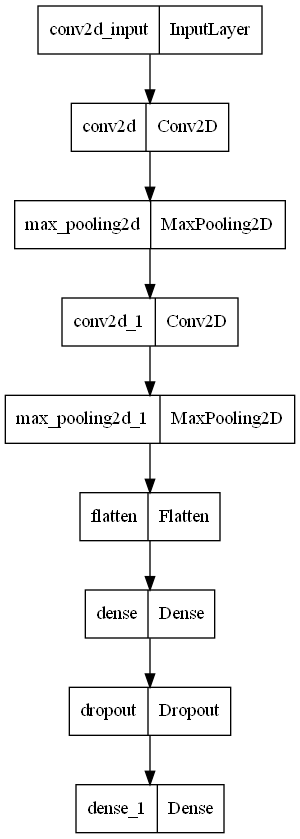

In [14]:
# CNN 신경망 모델 시각화
from tensorflow.keras.utils import plot_model

keras.utils.plot_model(model)

# You must install pydot (`pip install pydot`) and install graphviz 
# (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
# 패키지 설치하기
# conda install -c conda-forge pydot
# conda install -c conda-forge graphviz

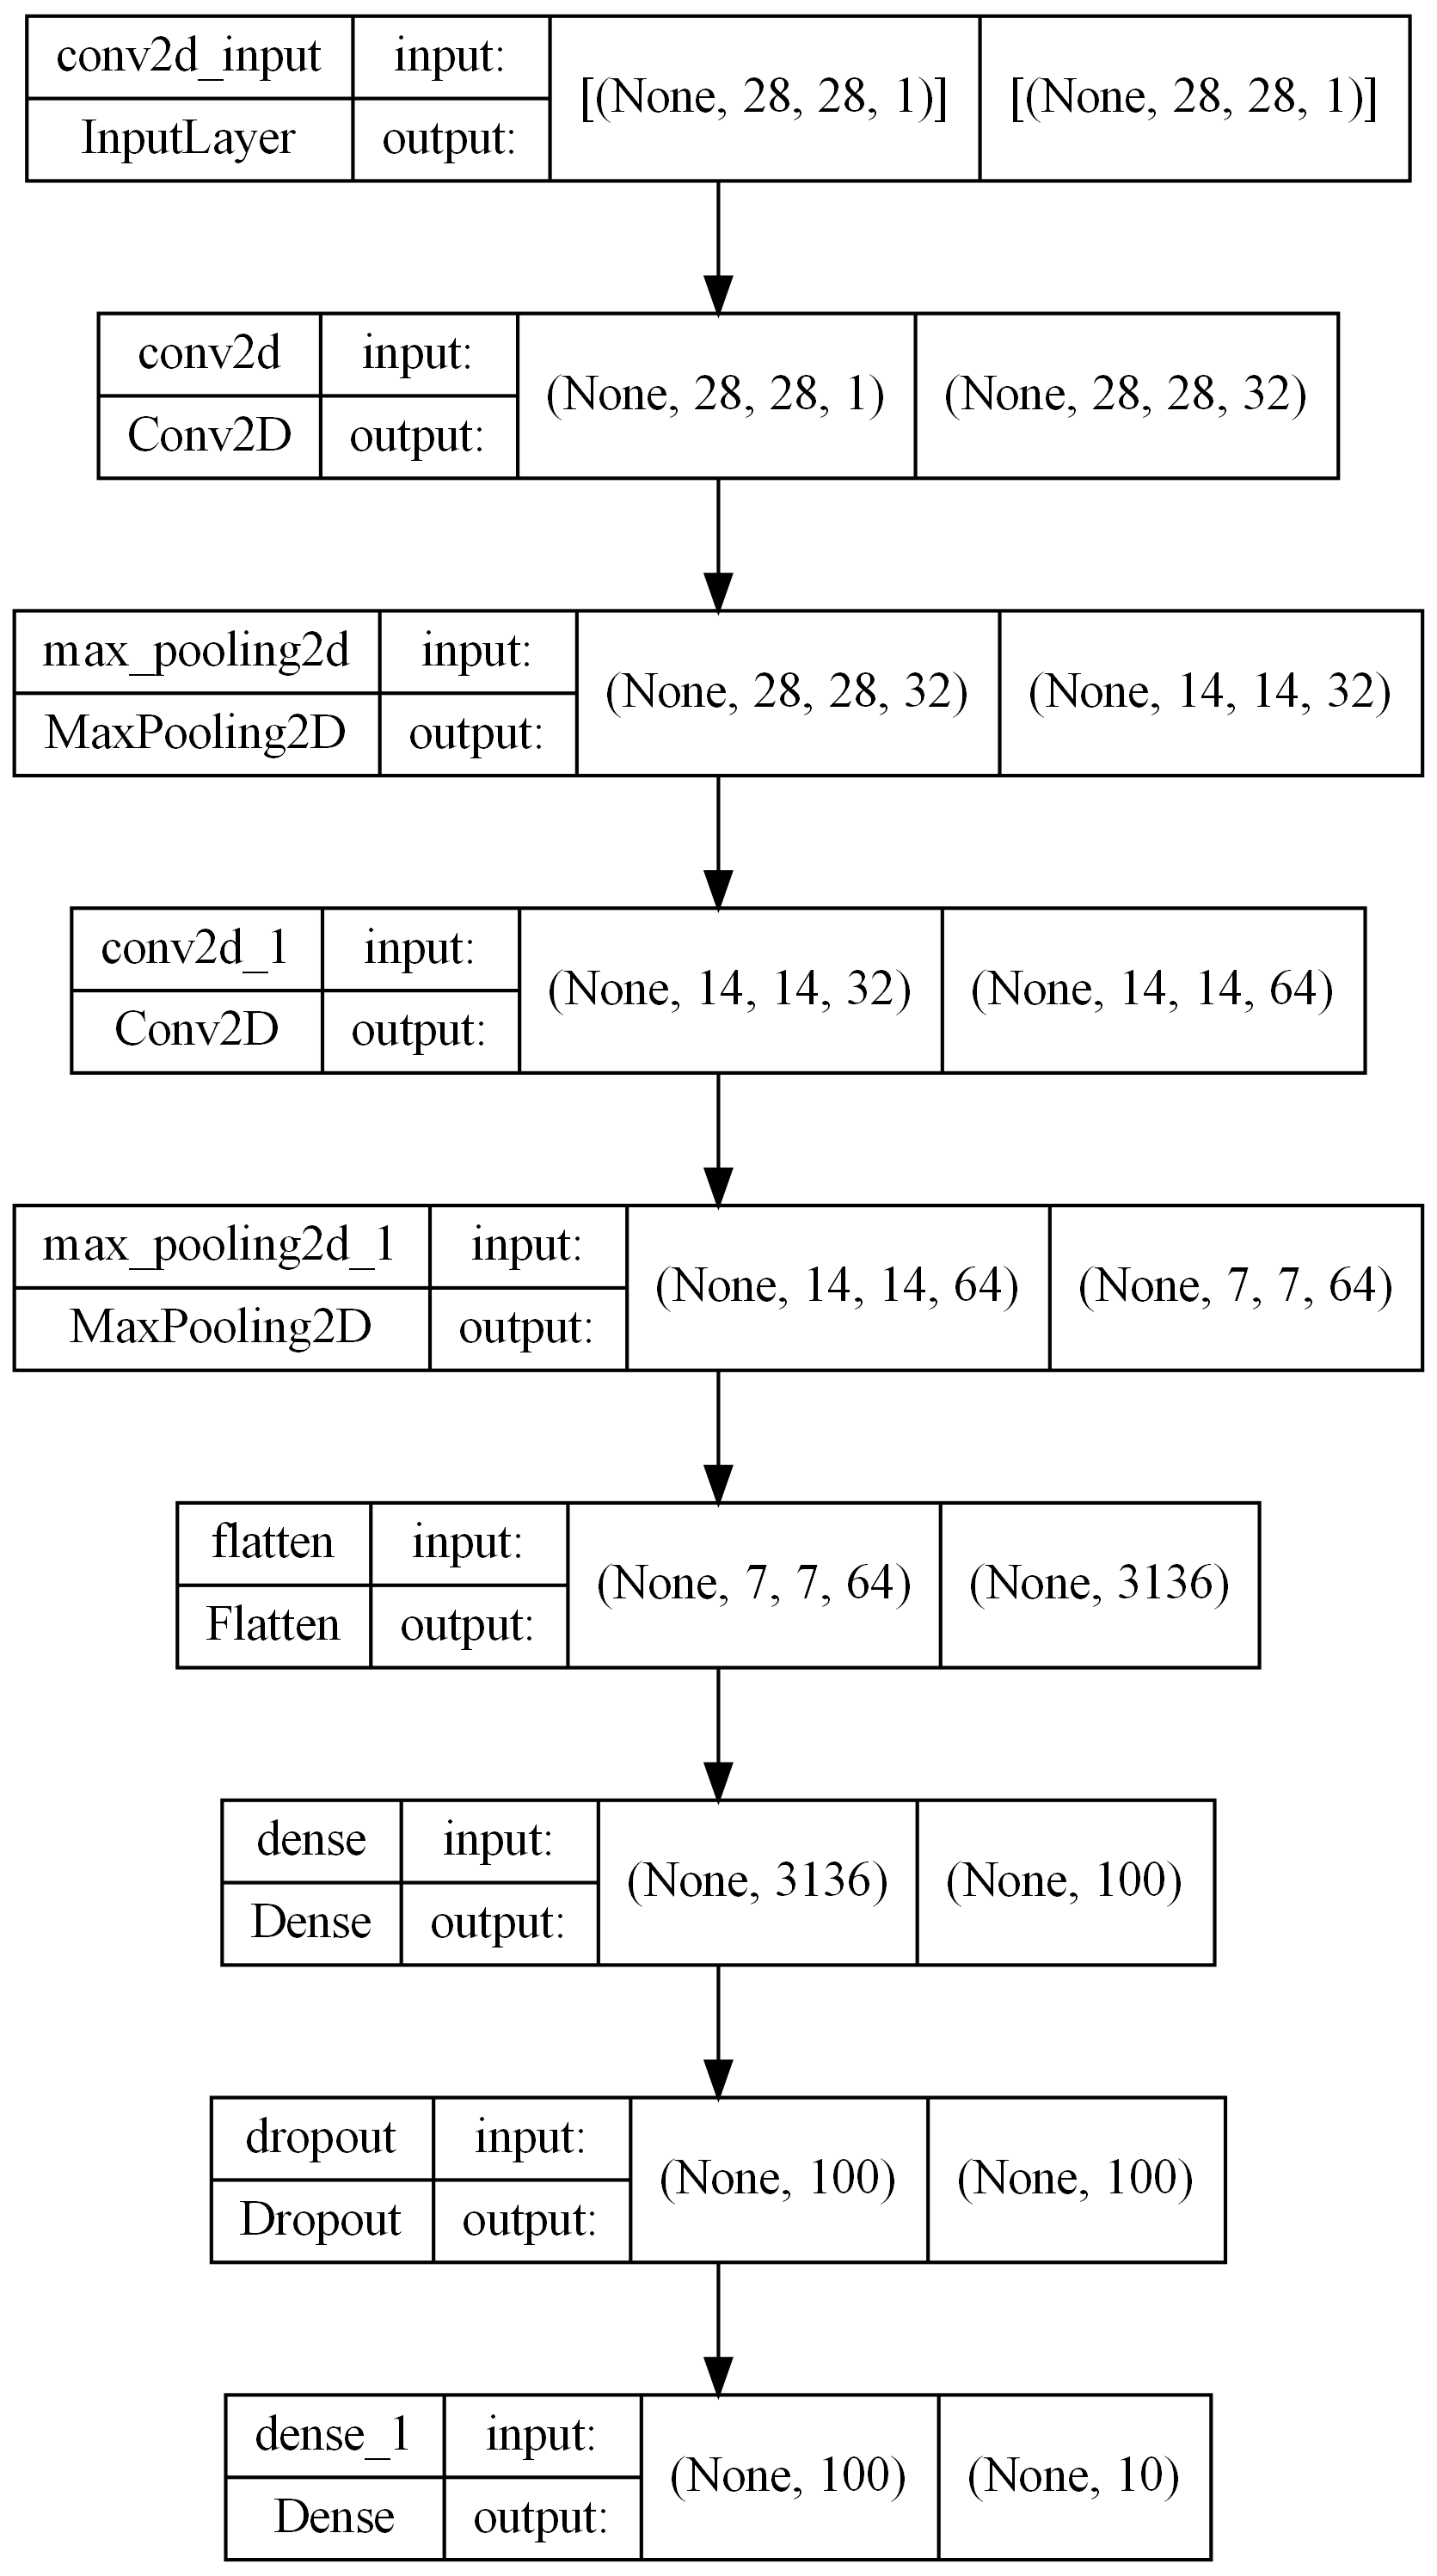

In [18]:
# show_shape : 층의 형태를
keras.utils.plot_model(model,
                      show_shapes=True,
                      to_file="./model/cnn_architecture.png",
                      dpi=300)
# 결과로 나온 그림이 산출물로 들어가야 한다 -> 모델 하나 만들 떄 마다 들어가야 한다 

In [19]:
# 모델 설정하기 : 컴파일 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [20]:
# 콜백함수 정의하기 
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_cnn_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

In [21]:
# 모델 훈련 시키기 
history = model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled,val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5143 - accuracy: 0.8199 - val_loss: 0.3240 - val_accuracy: 0.8785
Epoch 2/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.3400 - accuracy: 0.8794 - val_loss: 0.2803 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2932 - accuracy: 0.8935 - val_loss: 0.2468 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2635 - accuracy: 0.9046 - val_loss: 0.2485 - val_accuracy: 0.9070
Epoch 5/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2406 - accuracy: 0.9134 - val_loss: 0.2369 - val_accuracy: 0.9110
Epoch 6/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2221 - accuracy: 0.9180 - val_loss: 0.2277 - val_accuracy: 0.9178
Epoch 7/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2027 - accuracy: 0.9249 - val_loss: 0.2296 -

In [28]:
early_stopping_cb.stopped_epoch - 1 

9

In [29]:
import matplotlib.pyplot as plt

# 한글처리 
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

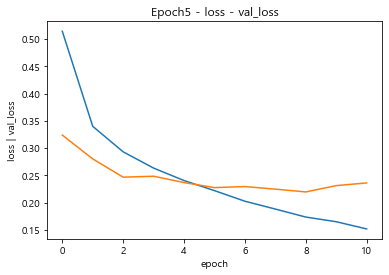

In [30]:
plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 - loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_loss&val_loss", dpi=300)
plt.show()

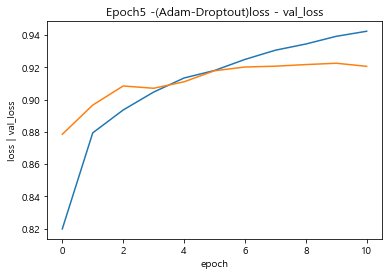

In [31]:
plt.plot( history.history['accuracy'])
plt.plot( history.history['val_accuracy'])

plt.title("Epoch5 -(Adam-Droptout)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam-Dropout)loss&val_loss", dpi=300)
plt.show()

In [32]:
# 모델 성능평가 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2197 - accuracy: 0.9217


[0.21972393989562988, 0.92166668176651]

In [33]:
# 훈련을 위해 사용한 검증 데이터 1개 차원 확인하기 
val_scaled[0].shape

(28, 28, 1)

In [34]:
# 정규화 데이터를, 이미지로 복원하기 위해 2차원으로 증강하기 
# - 이미지 확인을 위해서는 (28,28)로 만들어야함
val_scaled[0].reshape(28,28).shape

(28, 28)

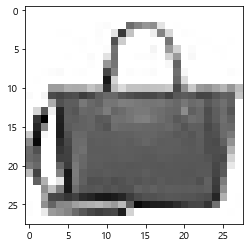

In [35]:
# 2차원 이미지 데이터를 -> 이미지로 복원하기 (그리기)
plt.imshow(val_scaled[0].reshape(28,28), cmap="gray_r")
plt.show()

In [36]:
# 예측(predict) 하기 
preds = model.predict(val_scaled[0 : 1])
preds

array([[4.5396179e-25, 0.0000000e+00, 9.4690564e-27, 1.8301768e-29,
        9.0148110e-28, 3.3342992e-21, 8.3700449e-25, 2.8942325e-25,
        1.0000000e+00, 1.1053413e-24]], dtype=float32)

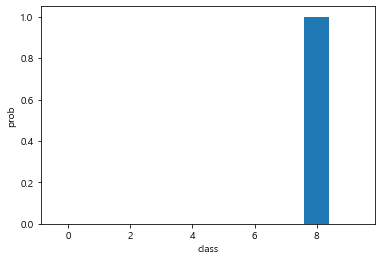

In [37]:
# 1개 이미지가 데이터 예측 결과 시각화 하기 
plt.bar(range(0,10), preds[0])
plt.xlabel("class")
plt.ylabel("prob")
plt.show()

In [40]:
# 종속변수 인덱스별 실제 이름 
classes = ["티셔츠", " 바지", "스웨터", " 드레스", "코트",
          "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]

In [44]:
# 1건 예측 값에 대한 값 추출하기 
import numpy as np 
# preds 리스트 데이터 중 가장 큰 값 추출 
print(np.argmax(preds))
# 실제 이름 추출
print(classes[np.argmax(preds)])

8
가방


In [46]:
# val_target 의 0번째 데이터와 위예측 값이 같은지 확인 
val_target[0]

8

# 최종 테스트 : test_input, test_target

In [47]:
"""
# 테스트 데이터 셋으로 예측(predict)하기 
# 출력1 : 각행의 이미지 + 예측값 + target 값
   -> 테스트 데이터 전체를 한번에 출력
# 출력2 : 정확도 및 오차율 
# 최종성능평가 함수에 넣어서 결과 확인 
"""

'\n# 테스트 데이터 셋으로 예측(predict)하기 \n# 출력1 : 각행의 이미지 + 예측값 + target 값\n   -> 데트스 데이터 전체를 한번에 출력\n# 출력2 : 정확도 및 오차율 \n# 최종성능평가 함수에 넣어서 결과 확인 \n'

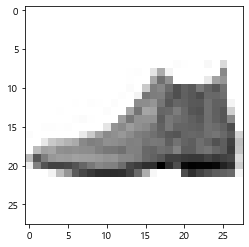

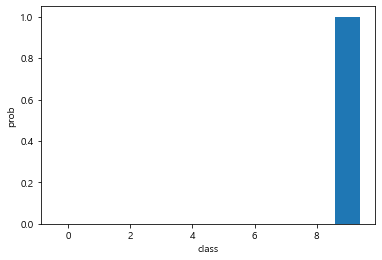

In [57]:
preds = model.predict(test_input)
preds
test_input[0].reshape(28,28).shape
plt.imshow(test_input[0].reshape(28,28), cmap="gray_r")
plt.show()

plt.bar(range(0,10), preds[0])
plt.xlabel("class")
plt.ylabel("prob")
plt.show()


In [81]:
preds = model.predict(test_input)
preds
o, x = 0, 0
for i in range(0, len(preds), 1) :
#     test_input[i].reshape(28,28).shape
#     plt.imshow(test_input[i].reshape(28,28), cmap="gray_r")
#     plt.show()
    print("예측값:", np.argmax(preds[i]), "target값:", test_target[i])
    if np.argmax(preds[i]) == test_target[i] :
        o += 1
    else :
        x += 1 
        
print (o,x) 
print("정확도:", round(o/len(test_target) * 100) ,"오차율:", round(x/len(test_target)* 100))

예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 4 target값: 4
예측값: 4 target값: 6
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 8 target값: 7
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 5 target값: 9
예측값: 1 target값: 1
예측값: 2 target값: 4
예측값: 4 target값: 6
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 4 target값: 3
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 6 target값: 3
예측값: 9 target값: 7
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 2 tar

예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 2 target값: 2
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 6 target값: 3
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 6 target값: 2
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 6 target값: 0
예측값: 6 target값: 6
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 3 target값: 1
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 4 target값: 2
예측값: 9 target값: 7
예측값: 4 tar

예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 4 target값: 6
예측값: 4 target값: 2
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 7 target값: 7
예측값: 4 target값: 6
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 0 target값: 0
예측값: 5 target값: 5
예측값: 4 target값: 2
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 7 tar

예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 6 target값: 6
예측값: 2 target값: 2
예측값: 7 target값: 9
예측값: 0 target값: 6
예측값: 6 target값: 6
예측값: 0 target값: 0
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 6 target값: 2
예측값: 1 target값: 1
예측값: 0 target값: 0
예측값: 3 target값: 3
예측값: 5 target값: 5
예측값: 7 target값: 9
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 4 target값: 2
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 4 target값: 2
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 6 target값: 2
예측값: 3 target값: 3
예측값: 6 target값: 6
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 6 target값: 6
예측값: 8 target값: 8
예측값: 6 target값: 6
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 4 target값: 8
예측값: 2 target값: 2
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 6 target값: 0
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 9 tar

예측값: 4 target값: 0
예측값: 4 target값: 3
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 6 target값: 2
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 6 target값: 0
예측값: 9 target값: 9
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 7 target값: 9
예측값: 5 target값: 5
예측값: 9 target값: 7
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 4 target값: 6
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 6 target값: 2
예측값: 9 target값: 9
예측값: 9 target값: 9
예측값: 1 target값: 6
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 8 tar

예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 4 target값: 3
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 7 target값: 7
예측값: 0 target값: 0
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 4 target값: 6
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 4 target값: 6
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 2 target값: 0
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 6 target값: 0
예측값: 3 target값: 3
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 4 target값: 6
예측값: 5 target값: 5
예측값: 4 target값: 2
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 3 tar

예측값: 6 target값: 6
예측값: 4 target값: 2
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 4 target값: 3
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 0 target값: 0
예측값: 3 target값: 4
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 5 target값: 7
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 1 target값: 1
예측값: 8 target값: 6
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 7 target값: 9
예측값: 7 target값: 7
예측값: 4 target값: 0
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 6 target값: 0
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 8 target값: 8
예측값: 6 target값: 8
예측값: 1 target값: 1
예측값: 4 target값: 4
예측값: 1 tar

예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 1 target값: 0
예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 0 target값: 6
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 2 target값: 2
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 2 target값: 2
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 6 target값: 6
예측값: 4 target값: 2
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 0 target값: 0
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 4 tar

예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 4 target값: 2
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 0 target값: 6
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 6 target값: 0
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 0 target값: 6
예측값: 6 target값: 0
예측값: 6 target값: 2
예측값: 8 target값: 8
예측값: 9 target값: 7
예측값: 9 target값: 9
예측값: 6 tar

예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 6 target값: 8
예측값: 4 target값: 2
예측값: 5 target값: 5
예측값: 6 target값: 6
예측값: 4 target값: 2
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 4 target값: 2
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 6 target값: 3
예측값: 7 target값: 7
예측값: 4 target값: 2
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 4 target값: 6
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 4 target값: 4
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 0 target값: 0
예측값: 3 target값: 3
예측값: 8 target값: 6
예측값: 6 target값: 4
예측값: 2 target값: 9
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 0 tar

예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 4 target값: 6
예측값: 0 target값: 0
예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 9 target값: 5
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 4 target값: 0
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 6 target값: 0
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 4 target값: 2
예측값: 0 target값: 0
예측값: 5 target값: 7
예측값: 2 target값: 2
예측값: 0 target값: 0
예측값: 0 target값: 0
예측값: 5 target값: 5
예측값: 1 target값: 1
예측값: 6 target값: 0
예측값: 8 target값: 8
예측값: 6 target값: 6
예측값: 3 target값: 3
예측값: 7 target값: 7
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 7 tar

예측값: 4 target값: 6
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 6 target값: 0
예측값: 3 target값: 3
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 6 target값: 3
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 6 target값: 0
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 6 target값: 6
예측값: 5 target값: 5
예측값: 4 target값: 2
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 6 target값: 0
예측값: 6 target값: 3
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 5 target값: 5
예측값: 6 target값: 6
예측값: 9 target값: 7
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 2 target값: 0
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 4 target값: 2
예측값: 2 target값: 2
예측값: 5 tar

예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 3 target값: 3
예측값: 0 target값: 0
예측값: 4 target값: 2
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 0 target값: 0
예측값: 4 target값: 6
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 4 target값: 2
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 7 target값: 7
예측값: 6 target값: 2
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 0 target값: 0
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 1 target값: 3
예측값: 2 target값: 2
예측값: 0 target값: 6
예측값: 5 target값: 5
예측값: 2 target값: 2
예측값: 3 tar

예측값: 5 target값: 5
예측값: 8 target값: 8
예측값: 5 target값: 7
예측값: 4 target값: 1
예측값: 9 target값: 9
예측값: 5 target값: 5
예측값: 6 target값: 6
예측값: 3 target값: 3
예측값: 6 target값: 6
예측값: 3 target값: 3
예측값: 6 target값: 0
예측값: 4 target값: 2
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 2 target값: 0
예측값: 5 target값: 5
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 6 target값: 6
예측값: 1 target값: 1
예측값: 0 target값: 0
예측값: 4 target값: 6
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 0 target값: 6
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 8 target값: 8
예측값: 7 tar

예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 6 target값: 2
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 3 target값: 0
예측값: 5 target값: 5
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 8 target값: 8
예측값: 4 target값: 4
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 2 target값: 2
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 0 target값: 0
예측값: 7 target값: 7
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 2 target값: 2
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 7 target값: 7
예측값: 3 target값: 3
예측값: 3 target값: 3
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 3 target값: 3
예측값: 5 target값: 5
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 7 target값: 7
예측값: 4 target값: 4
예측값: 1 tar

예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 6 target값: 2
예측값: 1 target값: 1
예측값: 6 target값: 6
예측값: 5 target값: 7
예측값: 1 target값: 1
예측값: 8 target값: 8
예측값: 5 target값: 5
예측값: 6 target값: 0
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 4 target값: 4
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 9 target값: 9
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 6 target값: 6
예측값: 6 target값: 0
예측값: 5 target값: 5
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 6 target값: 6
예측값: 8 target값: 8
예측값: 3 target값: 3
예측값: 6 target값: 6
예측값: 3 target값: 1
예측값: 8 target값: 8
예측값: 4 target값: 6
예측값: 1 target값: 1
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 3 target값: 3
예측값: 3 target값: 3
예측값: 1 target값: 1
예측값: 9 target값: 9
예측값: 2 target값: 2
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 2 target값: 2
예측값: 3 target값: 3
예측값: 4 target값: 6
예측값: 2 target값: 2
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 9 target값: 9
예측값: 0 target값: 0
예측값: 9 target값: 7
예측값: 1 target값: 1
예측값: 1 tar

예측값: 9 target값: 9
예측값: 4 target값: 4
예측값: 8 target값: 8
예측값: 8 target값: 8
예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 4 target값: 6
예측값: 4 target값: 4
예측값: 0 target값: 0
예측값: 6 target값: 6
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 2 target값: 6
예측값: 1 target값: 1
예측값: 3 target값: 6
예측값: 3 target값: 3
예측값: 2 target값: 2
예측값: 7 target값: 7
예측값: 8 target값: 8
예측값: 7 target값: 7
예측값: 0 target값: 0
예측값: 4 target값: 4
예측값: 3 target값: 3
예측값: 4 target값: 4
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 7 target값: 7
예측값: 9 target값: 9
예측값: 4 target값: 2
예측값: 5 target값: 5
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 5 target값: 5
예측값: 0 target값: 0
예측값: 1 target값: 1
예측값: 7 target값: 7
예측값: 6 target값: 6
예측값: 7 target값: 7
예측값: 4 target값: 6
예측값: 0 target값: 0
예측값: 0 target값: 0
예측값: 6 target값: 0
예측값: 5 target값: 5
예측값: 1 target값: 1
예측값: 1 target값: 1
예측값: 2 target값: 2
예측값: 4 target값: 4
예측값: 6 target값: 6
예측값: 9 target값: 9
예측값: 8 target값: 8
예측값: 1 target값: 1
예측값: 0 target값: 6
예측값: 1 target값: 1
예측값: 4 target값: 6
예측값: 8 target값: 8
예측값: 5 tar

In [96]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2400 - accuracy: 0.9197


[0.24004299938678741, 0.919700026512146]